In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\Eco-Route\Dataset LSTM (2).csv")
#data = pd.read_csv("/content/drive/MyDrive/Eco-Route/Dataset LSTM - Sheet9 (4).csv")

In [3]:
# Extract the emissions data
emissions = data['Emisi'].values

In [4]:
data.head()

,Minggu,Emisi
0,ke-1,49840
1,ke-2,46672
2,ke-3,41533
3,ke-4,41161
4,ke-5,41661


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Minggu  1000 non-null   object
 1   Emisi   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
data.describe()

,Emisi
count,1000.000000
mean,27000.540000
std,11414.490114
min,7935.000000
25%,16553.750000
50%,24953.500000
75%,38307.000000
max,49840.000000


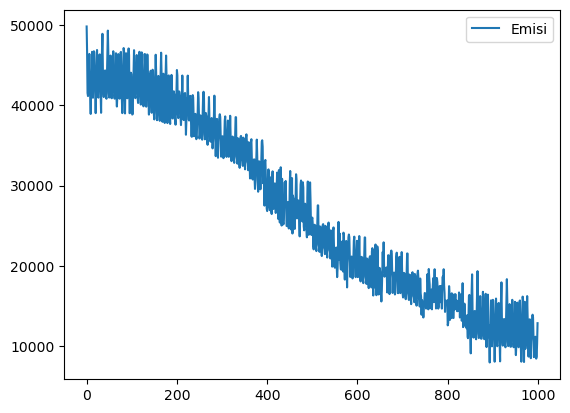

In [7]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ax.scatter(x = data['Minggu'], y = data['Emisi'])
# plt.ylabel('Emisi', fontsize=13)
# plt.xlabel('Minggu', fontsize=13)
# plt.show()

# Plot the actual vs. predicted emissions
x=data['Minggu']
y=data['Emisi']
plt.plot(y, label='Emisi')
plt.legend()
plt.show()

In [8]:
# Normalize the data
scaler = MinMaxScaler()
emissions = scaler.fit_transform(emissions.reshape(-1, 1))

In [9]:
emissions

array([[1.        ],
       [0.92440043],
       [0.8017659 ],
       [0.79288868],
       [0.80482043],
       [0.87001551],
       [0.91826751],
       [0.85383606],
       [0.78923756],
       [0.73976852],
       [0.85116335],
       [0.80692042],
       [0.92471066],
       [0.91972318],
       [0.78780575],
       [0.85529173],
       [0.92628565],
       [0.92394702],
       [0.8583224 ],
       [0.78601599],
       [0.74208328],
       [0.79704093],
       [0.8645985 ],
       [0.93003222],
       [0.85638945],
       [0.79157618],
       [0.78806825],
       [0.8532872 ],
       [0.9145448 ],
       [0.91702661],
       [0.85500537],
       [0.78687507],
       [0.74308555],
       [0.85937239],
       [0.92833791],
       [0.97818876],
       [0.87099391],
       [0.80742155],
       [0.78995347],
       [0.84968381],
       [0.86824961],
       [0.86908483],
       [0.85316788],
       [0.78935688],
       [0.78494213],
       [0.86006443],
       [0.92000955],
       [0.987

In [10]:
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

In [11]:
seq_length = 4
sequences, target = create_sequences(emissions, seq_length)
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

796
200
796
200


In [13]:
# Define the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(512, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(keras.layers.LSTM(256, activation='relu', return_sequences=True))
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=False))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 512)            1052672   
                                                                 
 lstm_1 (LSTM)               (None, 4, 256)            787456    
                                                                 
 lstm_2 (LSTM)               (None, 128)               197120    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,037,377
Trainable params: 2,037,377
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=250, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/250
25/25 [==============================] - 6s 104ms/step - loss: 0.1122 - val_loss: 0.0353
Epoch 2/250
25/25 [==============================] - 2s 80ms/step - loss: 0.0163 - val_loss: 0.0052
Epoch 3/250
25/25 [==============================] - 2s 83ms/step - loss: 0.0072 - val_loss: 0.0045
Epoch 4/250
25/25 [==============================] - 2s 79ms/step - loss: 0.0087 - val_loss: 0.0046
Epoch 5/250
25/25 [==============================] - 2s 75ms/step - loss: 0.0083 - val_loss: 0.0062
Epoch 6/250
25/25 [==============================] - 2s 76ms/step - loss: 0.0083 - val_loss: 0.0049
Epoch 7/250
25/25 [==============================] - 2s 77ms/step - loss: 0.0073 - val_loss: 0.0047
Epoch 8/250
25/25 [==============================] - 2s 76ms/step - loss: 0.0077 - val_loss: 0.0050
Epoch 9/250
25/25 [==============================] - 2s 75ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 10/250
25/25 [==============================] - 2s 76ms/step - loss: 0.0073 - val_loss: 0.004

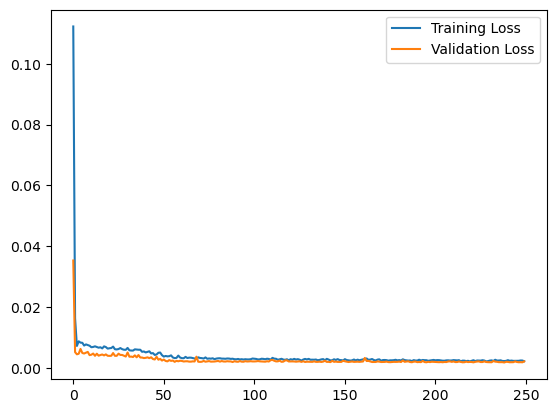

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [16]:
# Predict emissions for the test data
y_pred = model.predict(X_test)

7/7 [==============================] - 1s 17ms/step


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.03573872524232488
Mean Squared Error (MSE): 0.0021220451392552535
Root Mean Squared Error (RMSE): 0.0460656611724531


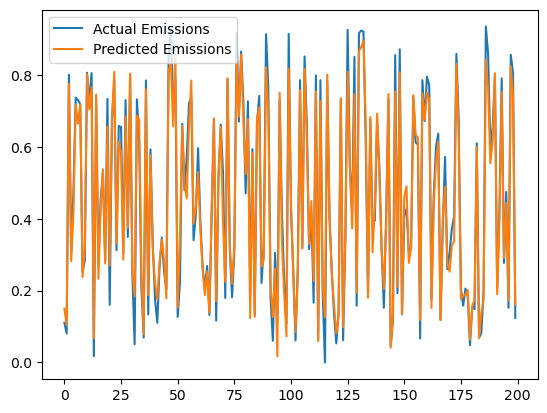

In [18]:
plt.plot(y_test, label='Actual Emissions')
plt.plot(y_pred, label='Predicted Emissions')
plt.legend()
plt.show()

In [19]:
act = []
pred = []
#for i in range(310):
i=45
Xt = model.predict(X_test[i].reshape(1,4,1))
print('predicted:{0}, actual:{1}'.format(scaler.inverse_transform(Xt),scaler.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scaler.inverse_transform(Xt))
act.append(scaler.inverse_transform(y_test[i].reshape(-1,1)))

1/1 [==============================] - 0s 65ms/step
predicted:[[15426.441]], actual:[[16503.]]


In [20]:
all_predicted = []
all_actual = []

for i in range(len(X_test)):
    Xt = model.predict(X_test[i].reshape(1, 4, 1))
    predicted_value = scaler.inverse_transform(Xt)[0][0]
    actual_value = scaler.inverse_transform(y_test[i].reshape(-1, 1))[0][0]

    all_predicted.append(predicted_value)
    all_actual.append(actual_value)

for i in range(len(all_predicted)):
    print(f"Data Point {i + 1} - Predicted: {all_predicted[i]}, Actual: {all_actual[i]}")


1/1 [==============================] - 0s 23ms/step
Data Point 1 - Predicted: 14220.541015625, Actual: 12564.0
Data Point 2 - Predicted: 12268.439453125, Actual: 11323.999999999998
Data Point 3 - Predicted: 40442.390625, Actual: 41523.0
Data Point 4 - Predicted: 19753.787109375, Actual: 20852.0
Data Point 5 - Predicted: 25585.53515625, Actual: 28019.0
Data Point 6 - Predicted: 38015.109375, Actual: 38840.0
Data Point 7 - Predicted: 35821.18359375, Actual: 38555.0
Data Point 8 - Predicted: 38067.73828125, Actual: 38072.0
Data Point 9 - Predicted: 17897.388671875, Actual: 18505.0
Data Point 10 - Predicted: 21459.029296875, Actual: 19829.0
Data Point 11 - Predicted: 41580.28125, Actual: 41747.0
Data Point 12 - Predicted: 37458.0, Actual: 38320.0
Data Point 13 - Predicted: 40030.8828125, Actual: 41710.0
Data Point 14 - Predicted: 10773.2314453125, Actual: 8668.0
Data Point 15 - Predicted: 39210.08984375, Actual: 38884.0
Data Point 16 - Predicted: 17696.119140625, Actual: 19328.0
Data Point

In [22]:
#from keras.src.backend import flatten
def predict(model, week):
  scaler=MinMaxScaler()
  weeks = np.array(week)
  weeks = scaler.fit_transform(weeks.reshape(-1,1))
  totalweeks = weeks.reshape(-1,4,1)
  pred = model.predict(totalweeks)

  predicted_emission = scaler.inverse_transform(pred).flatten()
  print("Alokasi emisi anda pada minggu selanjutnya sebesar: ", predicted_emission)

  return predicted_emission

In [23]:
week = [[45879, 41236, 41562, 43947]]
predict(model, week)

1/1 [==============================] - 0s 58ms/step
Alokasi emisi anda pada minggu selanjutnya sebesar:  [43133.527]


array([43133.527], dtype=float32)

In [24]:
tf.keras.models.save_model(model, 'prediksi_emisi_mingguan1.h5')

In [25]:
loaded_model = tf.keras.models.load_model('./prediksi_emisi_mingguan1.h5')

In [26]:
week = [[48588, 39273, 37621, 35162]]
predict(loaded_model, week)

1/1 [==============================] - 0s 412ms/step
Alokasi emisi anda pada minggu selanjutnya sebesar:  [37414.668]


array([37414.668], dtype=float32)